In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
import pandas as pd
import json
import pickle
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7

In [ ]:
#from miscc.config import cfg, cfg_from_file
sys.path.append('/content/gdrive/MyDrive/ManiGAN-master/data/birds/train')

In [ ]:
object = pd.read_pickle(r'/content/gdrive/MyDrive/ManiGAN-master/data/coco/train/filenames.pickle')

In [ ]:
object

In [ ]:
object = pd.read_pickle(r'/content/gdrive/MyDrive/ManiGAN-master/data/coco/test/filenames.pickle')

**Validation**

In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/val.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
items= []
for i in data_content['images']:
  items.append(i['file_name'].split('.')[0])

In [ ]:
with open('/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/filenames.pickle', 'wb') as f:
  pickle.dump(items, f)

In [ ]:
object = pd.read_pickle(r'/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/filenames.pickle')

In [ ]:
object

**Train**

In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/train/train.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [ ]:
items= []
for i in data_content['images']:
  items.append(i['file_name'].split('.')[0])

In [ ]:
with open('/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/train/filenames.pickle', 'wb') as f:
  pickle.dump(items, f)

In [ ]:
object = pd.read_pickle(r'/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz/train/filenames.pickle')

In [ ]:
object

**Text**

In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/train/train.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [ ]:
dictt = [{'caption': 'The side label of a can that is showing the ingredients.',
  'id': 971,
  'image_id': 194,
  'is_precanned': False,
  'is_rejected': False,
  'text_detected': True},
  {'caption': 'Quality issues are too severe to recognize visual content.',
  'id': 965,
  'image_id': 193,
  'is_precanned': True,
  'is_rejected': False,
  'text_detected': True}]

In [ ]:
dictt[1]['id']

965

In [ ]:
for i in data_content['images']:
  if i['id'] == 194:
    print(i)

{'file_name': 'VizWiz_train_00000194.jpg', 'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000194.jpg', 'id': 194, 'text_detected': True}


In [ ]:
for i in data_content['annotations']:
  if i['image_id'] == 194:
    print(i)

{'caption': 'The backside of a soup can showing its nutrition label', 'image_id': 194, 'is_precanned': False, 'is_rejected': False, 'id': 970, 'text_detected': False}
{'caption': 'The side label of a can that is showing the ingredients.', 'image_id': 194, 'is_precanned': False, 'is_rejected': False, 'id': 971, 'text_detected': True}
{'caption': 'Ingredients label and preparation instructions in French and English.', 'image_id': 194, 'is_precanned': False, 'is_rejected': False, 'id': 972, 'text_detected': True}
{'caption': 'Here is a can of beans showing the label and on a blue fabric surface.', 'image_id': 194, 'is_precanned': False, 'is_rejected': False, 'id': 973, 'text_detected': True}
{'caption': 'Label of a canned good showing the ingredients.', 'image_id': 194, 'is_precanned': False, 'is_rejected': False, 'id': 974, 'text_detected': True}


In [ ]:
df = pd.DataFrame(data_content['images'])

In [ ]:
df

,file_name,vizwiz_url,id,text_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True
1,VizWiz_train_00000001.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,1,True
2,VizWiz_train_00000002.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,2,True
3,VizWiz_train_00000003.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,3,True
4,VizWiz_train_00000004.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,4,True
...,...,...,...,...
23426,VizWiz_train_00023426.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23426,True
23427,VizWiz_train_00023427.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23427,False
23428,VizWiz_train_00023428.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23428,True
23429,VizWiz_train_00023429.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23429,True


In [ ]:
df_captions = pd.DataFrame(data_content['annotations'])
df_captions

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,0,False,False,0,True
1,A green and white plastic condiment bottle con...,0,False,False,1,True
2,Quality issues are too severe to recognize vis...,0,True,True,2,True
3,A bottle of spices in a plastic container layi...,0,False,False,3,True
4,some basil leaves in a container on a counter,0,False,False,4,True
...,...,...,...,...,...,...
117150,The back of a plastic card such as a credit ca...,23430,False,False,117150,True
117151,A card is seen with a scratch strip to reveal ...,23430,False,False,117151,True
117152,The back of a gift card without the silver str...,23430,False,False,117152,True
117153,The back of a plastic money or credit card wit...,23430,False,False,117153,True


In [ ]:
final_df = pd.merge(df, df_captions, left_on='id', right_on='image_id')

In [ ]:
final_df['text_name'] = final_df['file_name'].apply(lambda x: x.split('.')[0])

In [ ]:
final_df.head()

,file_name,vizwiz_url,id_x,text_detected_x,caption,image_id,is_precanned,is_rejected,id_y,text_detected_y,text_name
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS T...,0,False,False,0,True,VizWiz_train_00000000
1,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,A green and white plastic condiment bottle con...,0,False,False,1,True,VizWiz_train_00000000
2,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,Quality issues are too severe to recognize vis...,0,True,True,2,True,VizWiz_train_00000000
3,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,A bottle of spices in a plastic container layi...,0,False,False,3,True,VizWiz_train_00000000
4,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True,some basil leaves in a container on a counter,0,False,False,4,True,VizWiz_train_00000000


In [ ]:
x = final_df.id_x.unique()
x = x.tolist()

In [ ]:
for i in x:
  new_df = final_df[final_df['id_x'] == i]
  file_name = new_df['text_name'].iloc[0]
  writePath = '/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/text/' + file_name + '.txt'
  new_df_list = list(new_df['caption'])
  with open(writePath, 'a') as f:
    f.write("\n".join(new_df_list))
    #for item in new_df_list:`
      #f.write("%s\n" % item)

In [ ]:
path, dirs, files = next(os.walk("/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/text/"))
file_count = len(files)

In [ ]:
file_count

23431

In [ ]:
f = open("/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/text/VizWiz_train_00023430.txt", 'r')

In [ ]:
print(f.read())

The back of a plastic card such as a credit card that has a lot of written instructions or information on it, and a scratch off area that says Scratch off Gently For Claim Code.
A card is seen with a scratch strip to reveal a code.
The back of a gift card without the silver stripe scratched off
The back of a plastic money or credit card with a scratch off area for hidden information.
A gift card is on top of a table.


**Captions**

In [ ]:
object = pd.read_pickle(r'/content/gdrive/MyDrive/ManiGAN-master/data/coco/captions.pickle')

In [ ]:
len(object[2])

27297

**EDA**

For report talk about the images that were removed.

*   'Quality issues are too severe to recognize visual content.'

Look at number of images, show image sample in report and mention the data siz after removing it.



In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/train/train.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [ ]:
poor_images_train = []
for item in data_content['annotations']:
  if item['caption'] == 'Quality issues are too severe to recognize visual content.':
    poor_images_train.append(item)

In [ ]:
len(poor_images_train)

15159

In [ ]:
train_poor_Df = pd.DataFrame(poor_images_train)
train_poor_Df.head()

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,Quality issues are too severe to recognize vis...,0,True,True,2,True
1,Quality issues are too severe to recognize vis...,5,True,False,28,False
2,Quality issues are too severe to recognize vis...,15,True,False,76,False
3,Quality issues are too severe to recognize vis...,15,True,True,78,False
4,Quality issues are too severe to recognize vis...,15,True,False,79,False


In [ ]:
train_poor_Df.image_id.nunique()

7680

In [ ]:
for i in data_content['images']:
  if i['id'] == 6217:
    print(i)

{'file_name': 'VizWiz_train_00006217.jpg', 'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00006217.jpg', 'id': 6217, 'text_detected': False}


Groupby

In [ ]:
occurances = train_poor_Df.groupby(['image_id']).size().reset_index()

In [ ]:
occurances_df = pd.DataFrame(occurances)

In [ ]:
occurances_df = occurances_df.rename(columns={0: 'count'})

In [ ]:
occurances_df

,image_id,count
0,0,1
1,5,1
2,15,3
3,18,1
4,19,5
...,...,...
7675,23413,3
7676,23416,3
7677,23419,3
7678,23424,1


In [ ]:
occurances_df[occurances_df['count'] ==1]

,image_id,count
0,0,1
1,5,1
3,18,1
6,24,1
10,32,1
...,...,...
7665,23361,1
7669,23371,1
7672,23387,1
7674,23403,1


In [ ]:
occurances_count = occurances_df.groupby(['count']).size().reset_index()

In [ ]:
occurances_count = occurances_count.rename(columns={0: 'NumberOfImages'})

In [ ]:
occurances_count

,count,NumberOfImages
0,1,4122
1,2,1424
2,3,878
3,4,725
4,5,531


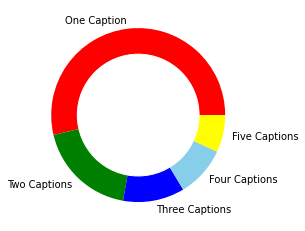

In [ ]:
labels = ['One Caption','Two Captions','Three Captions','Four Captions', 'Five Captions']
values = [4122, 1424, 878, 725, 531]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(values, labels=labels, colors=['red','green','blue','skyblue', 'yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/test/val.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [ ]:
poor_images_train = []
for item in data_content['annotations']:
  if item['caption'] == 'Quality issues are too severe to recognize visual content.':
    poor_images_train.append(item)

In [ ]:
val_poor_Df = pd.DataFrame(poor_images_train)
val_poor_Df.head()

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,Quality issues are too severe to recognize vis...,23437,True,False,117185,False
1,Quality issues are too severe to recognize vis...,23437,True,False,117186,False
2,Quality issues are too severe to recognize vis...,23437,True,False,117187,True
3,Quality issues are too severe to recognize vis...,23437,True,False,117188,True
4,Quality issues are too severe to recognize vis...,23437,True,False,117189,False


In [ ]:
val_poor_Df.image_id.nunique()

2528

In [ ]:
occurances = val_poor_Df.groupby(['image_id']).size().reset_index()

In [ ]:
occurances_df = pd.DataFrame(occurances)

In [ ]:
occurances_df = occurances_df.rename(columns={0: 'count'})

In [ ]:
occurances_df

,image_id,count
0,23437,5
1,23438,3
2,23439,3
3,23442,1
4,23444,4
...,...,...
2523,31154,1
2524,31157,2
2525,31162,1
2526,31163,1


In [ ]:
occurances_df[occurances_df['count'] ==1]

,image_id,count
3,23442,1
6,23446,1
7,23447,1
8,23453,1
10,23460,1
...,...,...
2522,31146,1
2523,31154,1
2525,31162,1
2526,31163,1


In [ ]:
occurances_count = occurances_df.groupby(['count']).size().reset_index()

In [ ]:
occurances_count = occurances_count.rename(columns={0: 'NumberOfImages'})

In [ ]:
occurances_count

,count,NumberOfImages
0,1,1297
1,2,480
2,3,286
3,4,273
4,5,192


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cafe_colors =  ['rgb(0,255,255)', 'rgb(100,200,255)', 'rgb(0,0,205)', 'rgb(0,0,139)', 'rgb(0,35,102)']

labels = ['One Caption','Two Captions','Three Captions','Four Captions', 'Five Captions']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[4122, 1424, 878, 725, 531], name="Train"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[1297, 480, 286, 273, 192], name="Validation"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, marker_colors=cafe_colors)

fig.update_layout(
    title_text="Quality issue: No of caption instance",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Train', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Val', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

**Text in Images**

In [ ]:
new_path = "/content/gdrive/MyDrive/Open-Edit/datasets/vizwiz_manigan/train/train.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [ ]:
df = pd.DataFrame(data_content['images'])

In [ ]:
df

,file_name,vizwiz_url,id,text_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True
1,VizWiz_val_00000001.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23432,True
2,VizWiz_val_00000002.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23433,True
3,VizWiz_val_00000003.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23434,True
4,VizWiz_val_00000004.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23435,True
...,...,...,...,...
7745,VizWiz_val_00007745.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,31176,True
7746,VizWiz_val_00007746.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,31177,True
7747,VizWiz_val_00007747.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,31178,True
7748,VizWiz_val_00007748.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,31179,False


In [ ]:
df.text_detected.value_counts()

True     5018
False    2732
Name: text_detected, dtype: int64

In [ ]:
df1 = pd.DataFrame(data_content['images'])
df1

,file_name,vizwiz_url,id,text_detected
0,VizWiz_train_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,0,True
1,VizWiz_train_00000001.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,1,True
2,VizWiz_train_00000002.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,2,True
3,VizWiz_train_00000003.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,3,True
4,VizWiz_train_00000004.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,4,True
...,...,...,...,...
23426,VizWiz_train_00023426.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23426,True
23427,VizWiz_train_00023427.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23427,False
23428,VizWiz_train_00023428.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23428,True
23429,VizWiz_train_00023429.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23429,True


In [ ]:
df1.text_detected.value_counts()

True     14701
False     8730
Name: text_detected, dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cafe_colors =  ['rgb(0,255,255)', 'rgb(100,200,255)', 'rgb(0,35,102)', 'rgb(0,0,139)', 'rgb(0,0,205)']

labels = ['True','False']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[14701, 8730], name="Train"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[5018, 2732], name="Validation"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, marker_colors=cafe_colors)

fig.update_layout(
    title_text="Quality issue: No of caption instance",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Train', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Val', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()